In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("data\placement.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [4]:
data.describe()

,Unnamed: 0,cgpa,iq,placement
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,0.000000,3.300000,37.000000,0.000000
25%,24.750000,5.075000,101.500000,0.000000
50%,49.500000,6.000000,127.500000,0.500000
75%,74.250000,6.900000,149.000000,1.000000
max,99.000000,8.500000,233.000000,1.000000


In [5]:
data.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
data.isna().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

In [7]:
data.corr()

,Unnamed: 0,cgpa,iq,placement
Unnamed: 0,1.000000,0.047478,-0.019080,0.144807
cgpa,0.047478,1.000000,-0.098791,0.821688
iq,-0.019080,-0.098791,1.000000,-0.083031
placement,0.144807,0.821688,-0.083031,1.000000


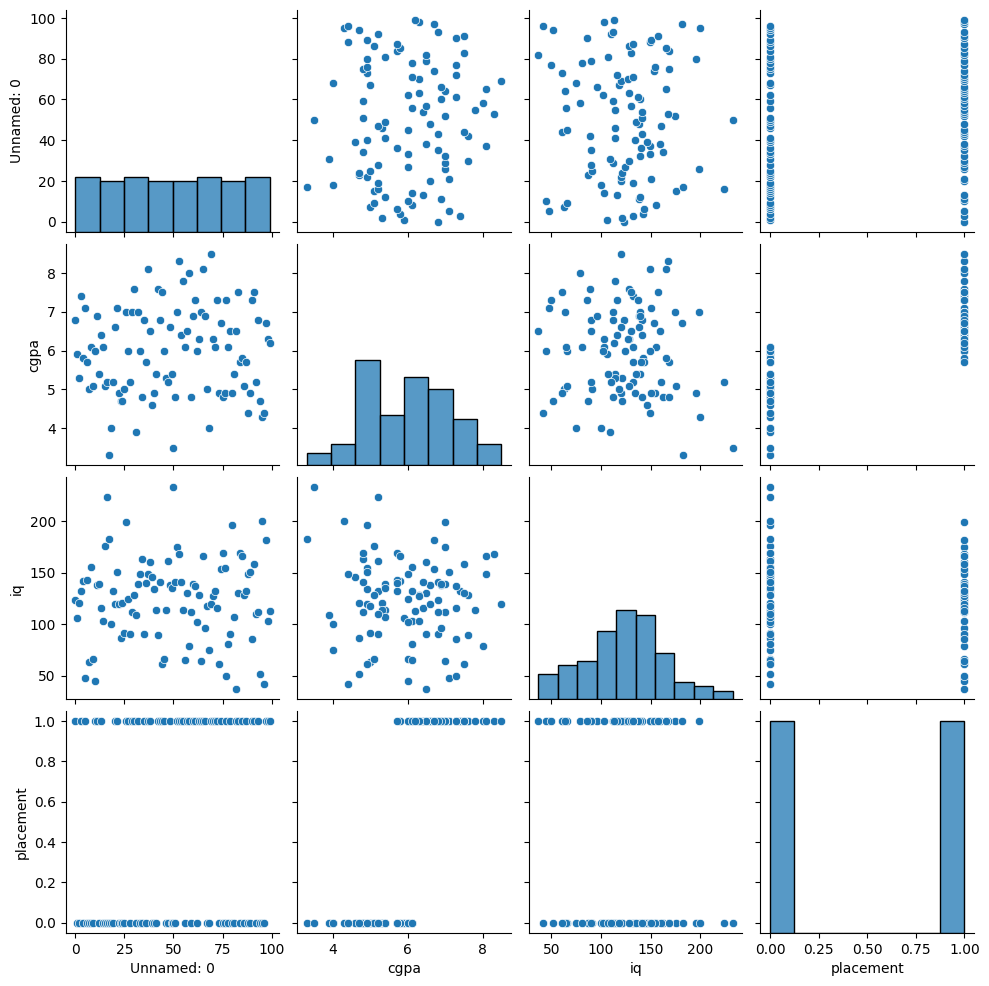

In [8]:
sns.pairplot(data)

In [9]:
df = data.iloc[:,1:]

In [10]:
df.tail()

,cgpa,iq,placement
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1
99,6.2,113.0,1


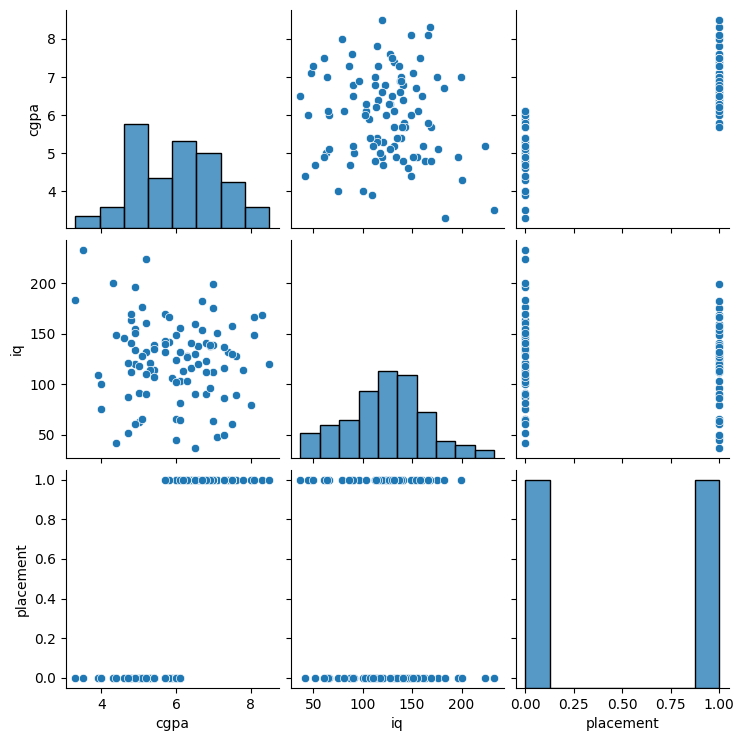

In [11]:
sns.pairplot(df)

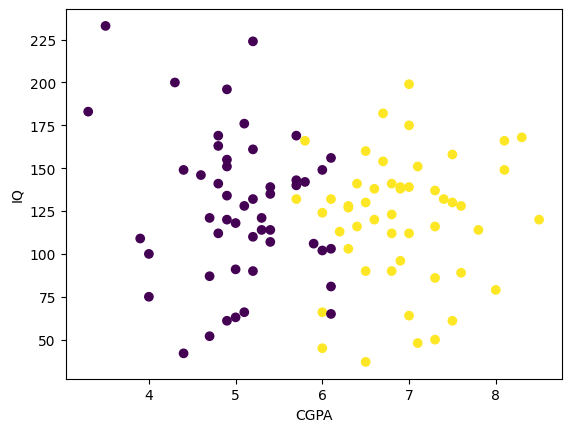

In [12]:
plt.scatter(df.cgpa, df.iq, c=df.placement)
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.show()

In [13]:
# X = df.iloc[:,0:2]
# y = df.iloc[:,-1]

X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [14]:
X.shape

(100, 2)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=1)

In [16]:
X_test.shape

(10, 2)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)

In [19]:
# X_train

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [21]:
lr.fit(X_train,y_train)

LogisticRegression()

In [22]:
lr.intercept_

array([0.10689757])

In [23]:
lr.coef_

array([[3.19645165, 0.11221672]])

In [24]:
y_pred = lr.predict(X_test)

C:\Users\GANESH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [25]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
y_test

80    0
84    0
33    0
81    0
93    1
17    0
36    0
82    1
69    1
65    1
Name: placement, dtype: int64

In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.4

In [30]:
# pip install mlxtend

In [29]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

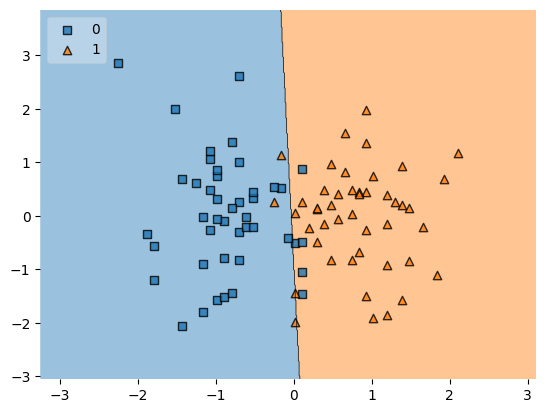

In [32]:
plot_decision_regions(X_train, y_train.values, clf=lr, legend=2)

In [34]:
import pickle

pickle.dump(lr,open('lr_model.pkl','wb'))